# 1. Load MNIST Database

读取数据基本上没什么难度，不用操心文件读取，reshape，scale什么的事情，也用不着分batch，分validation组，因为是keras自带的数据，以后读数据会遇到各种情况，到时候再说

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


In [2]:
X_train.shape

(60000, 28, 28)

可以看出数据是没有flatten的,另外也可以用X_train[0]看到数据是0-255的

In [3]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

可以看到label暂时还不是one hot的

# 2. Visualize 

一些图示，注意坐标对应关系

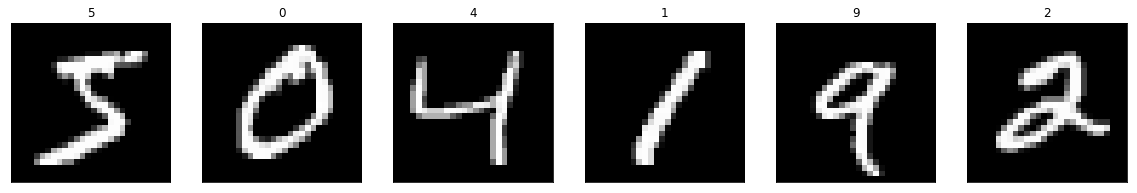

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

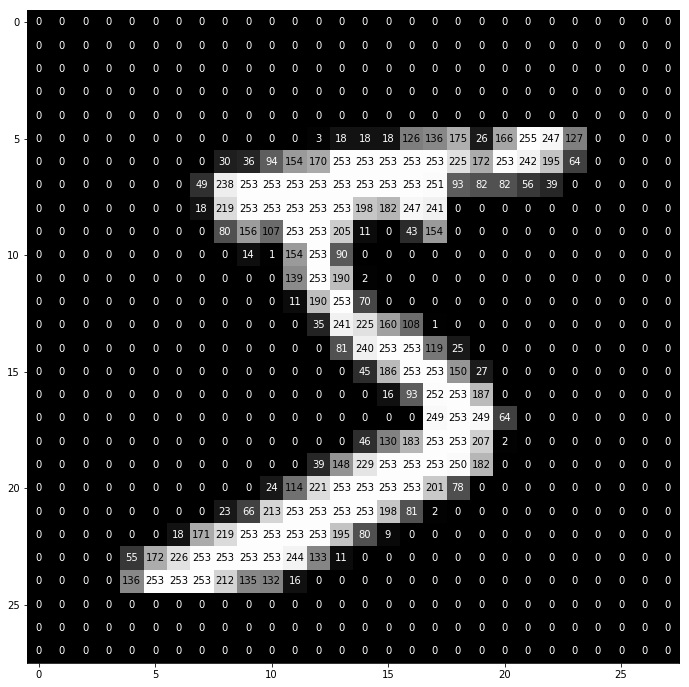

In [5]:
# a good way to show greyscale image
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x), #notice here
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

# 3. Pre-processing

In [6]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [7]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train_onehot = np_utils.to_categorical(y_train, 10)
y_test_onehot = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_test_onehot[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [8]:
X_train.shape

(60000, 28, 28)

# 4.  Define model architecture

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train_onehot, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s - loss: 0.2737 - acc: 0.9151 - val_loss: 0.1264 - val_acc: 0.9603
Epoch 2/10
48000/48000 [==============================] - 2s - loss: 0.1115 - acc: 0.9656 - val_loss: 0.0992 - val_acc: 0.9714
Epoch 3/10
48000/48000 [==============================] - 2s - loss: 0.0808 - acc: 0.9759 - val_loss: 0.0914 - val_acc: 0.9738
Epoch 4/10
48000/48000 [==============================] - 2s - loss: 0.0639 - acc: 0.9804 - val_loss: 0.0813 - val_acc: 0.9775
Epoch 5/10
48000/48000 [==============================] - 2s - loss: 0.0500 - acc: 0.9849 - val_loss: 0.0868 - val_acc: 0.9803
Epoch 6/10
48000/48000 [==============================] - 2s - loss: 0.0432 - acc: 0.9870 - val_loss: 0.0836 - val_acc: 0.9802
Epoch 7/10
48000/48000 [==============================] - 2s - loss: 0.0389 - acc: 0.9878 - val_loss: 0.0934 - val_acc: 0.9783
Epoch 8/10
48000/48000 [==============================] - 2s 

In [11]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test_onehot, verbose=1)
accuracy = 100*score[1]

# print test accuracy
print('\nTest accuracy: %.4f%%' % accuracy)

 9536/10000 [===========================>..] - ETA: 0s
Test accuracy: 97.9300%


# 5. Data Augmentation

这里需要使用keras自带的image preprocessing工具做data augmentation，https://keras.io/preprocessing/image/

注意flow这个method要求读入的x是rank 4的

x: data. Should have rank 4. In case of grayscale data, the channels axis should have value 1, and in case of RGB data, it should have value 3.

In [12]:
X_test = np.expand_dims(X_test,3)
X_train = np.expand_dims(X_train,3)

In [24]:
from keras.preprocessing import image
batch_size = 60
gen = image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
train_batches = gen.flow(X_train, y_train_onehot, batch_size=batch_size)
test_batches = gen.flow(X_test, y_test_onehot, batch_size=batch_size)

In [25]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 10, 10, 64)        256       
__________

In [26]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
#hist = model.fit(X_train, y_train, batch_size=128, epochs=2, 
#                 validation_split=0.2, callbacks=[checkpointer],
#                 verbose=1, shuffle=True)

#i find fit_generator became extremly slow...
hist = model.fit_generator(train_batches, train_batches.n//batch_size, epochs=4,
                           validation_data=test_batches, validation_steps=test_batches.n//batch_size)

Epoch 1/2
1000/1000 [==============================] - 23s - loss: 0.2014 - acc: 0.9384 - val_loss: 0.1096 - val_acc: 0.9668
Epoch 2/2
1000/1000 [==============================] - 23s - loss: 0.0880 - acc: 0.9740 - val_loss: 0.0600 - val_acc: 0.9813


In [28]:
model.optimizer.lr=0.1
model.fit_generator(train_batches, train_batches.n//batch_size, epochs=2,
                           validation_data=test_batches, validation_steps=test_batches.n//batch_size)

Epoch 1/2
1000/1000 [==============================] - 23s - loss: 0.0730 - acc: 0.9783 - val_loss: 0.0556 - val_acc: 0.9843
Epoch 2/2
1000/1000 [==============================] - 23s - loss: 0.0647 - acc: 0.9804 - val_loss: 0.0385 - val_acc: 0.9891


In [29]:
model.optimizer.lr=0.01
model.fit_generator(train_batches, train_batches.n//batch_size, epochs=4,
                           validation_data=test_batches, validation_steps=test_batches.n//batch_size)

Epoch 1/4
1000/1000 [==============================] - 23s - loss: 0.0596 - acc: 0.9824 - val_loss: 0.0505 - val_acc: 0.9855
Epoch 2/4
1000/1000 [==============================] - 23s - loss: 0.0549 - acc: 0.9842 - val_loss: 0.0409 - val_acc: 0.9874
Epoch 3/4
1000/1000 [==============================] - 23s - loss: 0.0506 - acc: 0.9854 - val_loss: 0.0406 - val_acc: 0.9876
Epoch 4/4
1000/1000 [==============================] - 23s - loss: 0.0478 - acc: 0.9862 - val_loss: 0.0625 - val_acc: 0.9811


In [30]:
#checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1, save_best_only=True)
model.optimizer.lr=0.001
model.fit_generator(train_batches, train_batches.n//batch_size, epochs=4,
                           validation_data=test_batches, validation_steps=test_batches.n//batch_size)

Epoch 1/4
1000/1000 [==============================] - 23s - loss: 0.0441 - acc: 0.9873 - val_loss: 0.0448 - val_acc: 0.9868
Epoch 2/4
1000/1000 [==============================] - 23s - loss: 0.0422 - acc: 0.9878 - val_loss: 0.0350 - val_acc: 0.9900
Epoch 3/4
1000/1000 [==============================] - 23s - loss: 0.0380 - acc: 0.9885 - val_loss: 0.0299 - val_acc: 0.9916
Epoch 4/4
1000/1000 [==============================] - 23s - loss: 0.0404 - acc: 0.9884 - val_loss: 0.0283 - val_acc: 0.9919


# Result

In [31]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test_onehot, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('\nTest accuracy: %.4f%%' % accuracy)


Test accuracy: 99.4300%


In [32]:
y_test_pred = model.predict_classes(X_test, verbose=0)
test_acc = np.sum(np.equal(y_test, y_test_pred)) / X_test.shape[0]
print('Test accuracy: %.4f%%' % (test_acc * 100))

Test accuracy: 99.4300%


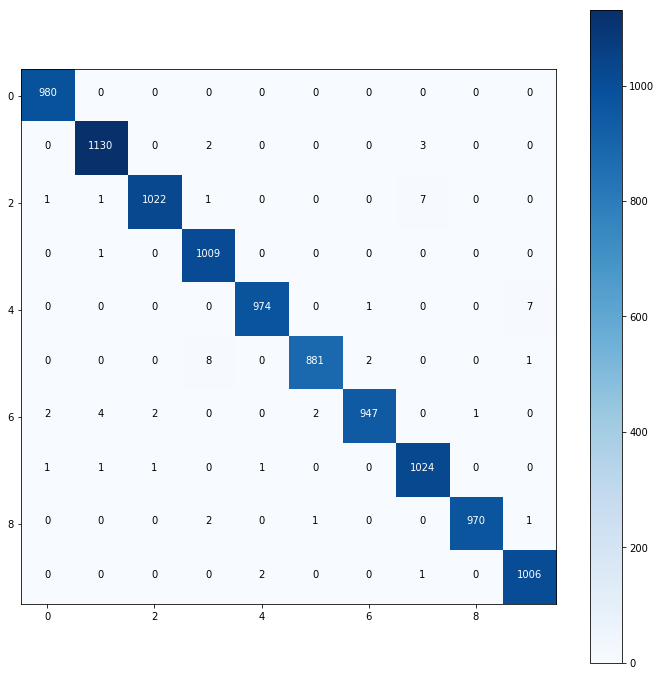

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
fig = plt.figure(figsize=(12,12))
plt.imshow(cm, interpolation='nearest',cmap = plt.cm.Blues)
plt.colorbar()
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > cm.max() / 2 else "black")

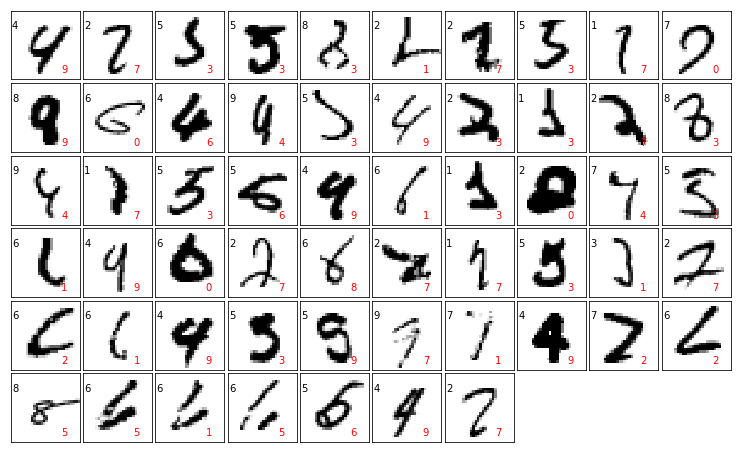

In [34]:
X_test_wrong = X_test[y_test != y_test_pred]
y_test_wrong = y_test[y_test != y_test_pred]
y_pred_wrong = y_test_pred[y_test != y_test_pred]

fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(sum(y_test != y_test_pred)):
    ax = fig.add_subplot(6,10,i+1,xticks=[],yticks=[])
    ax.imshow(X_test_wrong[i].reshape(28,28), cmap = plt.cm.binary)
    ax.text(0, 7, str(y_test_wrong[i]))
    ax.text(20, 25, str(y_pred_wrong[i]), color='red')


#pick = (np.random.rand(64) * len(y_test_wrong)).astype(int)

#for i,j in enumerate(pick):
#    ax = fig.add_subplot(10, 6, i + 1, xticks=[], yticks=[])
#    ax.imshow(X_test_wrong[j].reshape(28,28), cmap=plt.cm.binary)
#    ax.text(0, 7, str(y_test_wrong[j]))
#    ax.text(20, 25, str(y_pred_wrong[j]), color = 'red')

In [35]:
sum(y_test != y_test_pred)

57